The data that situated beyond the range. It can be exceptional which affects badly on the preddiction.

In case of outlier we can identify it by looking art max min and mean. Boxplot is an exelent way to observe

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset=pd.read_csv("car_price_dataset.csv")


In [3]:
dataset.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
 10  z_score       10000 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 859.5+ KB


As we can see milage has something going on

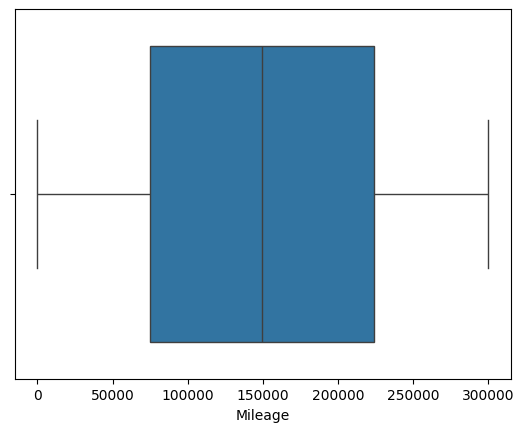

In [4]:
sns.boxplot(x="Mileage",data=dataset)
plt.show()

In [5]:
q1=dataset["Mileage"].quantile(0.25)
q3=dataset["Mileage"].quantile(0.75)
IQR=q3-q1
# intra quantile range 

In [6]:
min_range=q1-(1.5*IQR)
max_range=q3-(1.5*IQR)
min_range,max_range

(-148743.125, 185.125)

In [7]:
new_dataset= dataset[dataset["Mileage"]<=max_range]
new_dataset

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
538,Ford,Fiesta,2001,2.6,Electric,Semi-Automatic,74,2,2,8998
3767,Toyota,RAV4,2008,2.8,Hybrid,Semi-Automatic,88,2,5,10298
6641,BMW,X5,2019,2.4,Hybrid,Manual,178,3,1,13196
6824,Ford,Explorer,2006,1.6,Electric,Semi-Automatic,25,3,2,9499
9677,Audi,A3,2023,1.1,Hybrid,Semi-Automatic,184,2,4,13096


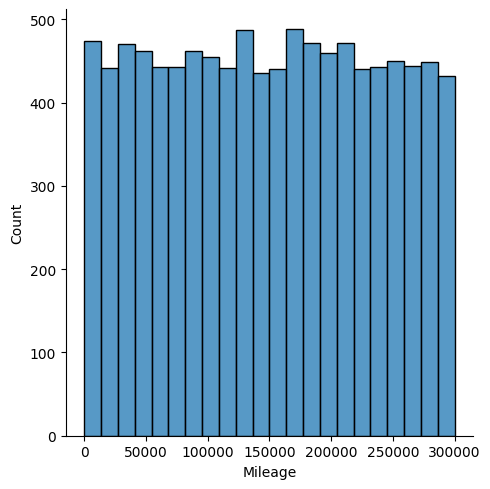

In [8]:
sns.displot(dataset["Mileage"])
plt.show()

We can also get outlier by z zero method
z=(x-mean)/deviation

In [9]:
dataset.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [11]:
z_score=(dataset["Mileage"]-dataset["Mileage"].mean())/dataset["Mileage"].std()

In [16]:
dataset["z_score"]=z_score

In [17]:
dataset[dataset["z_score"]<3]

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,z_score
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,1.629994
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,-1.666812
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,0.952255
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,0.135908
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,1.591464
...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,-1.661738
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,0.217335
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,-0.724900
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,0.886594


As the column and row number is same as before so here is no outlier